# Project 3

In [1]:
using Plots, CSV, Lathe, DataFrames, MLBase, GLM, StatsBase, Statistics, LaTeXStrings, DataStructures, MarketData
theme(:dark)

### Qestion 1

In [2]:
df1 = CSV.read("Salary_Data.csv", DataFrame)

,YearsExperience,Salary
,Float64,Float64
1,1.1,39343.0
2,1.3,46205.0
3,1.5,37731.0
4,2.0,43525.0
5,2.2,39891.0
6,2.9,56642.0
7,3.0,60150.0
8,3.2,54445.0
9,3.2,64445.0


In [3]:
names(df1)

2-element Vector{String}:
 "YearsExperience"
 "Salary"

In [4]:
cor(df1."YearsExperience", df1."Salary")

0.9782416184887598

#### *Train-Test Split*

In [5]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df1, .75)

(23×2 DataFrame
 Row │ YearsExperience  Salary   
     │ Float64          Float64  
─────┼───────────────────────────
   1 │             1.1   39343.0
   2 │             1.5   37731.0
   3 │             2.0   43525.0
   4 │             2.9   56642.0
   5 │             3.0   60150.0
   6 │             3.2   54445.0
   7 │             3.7   57189.0
   8 │             3.9   63218.0
   9 │             4.0   55794.0
  10 │             4.0   56957.0
  11 │             4.5   61111.0
  12 │             4.9   67938.0
  13 │             5.1   66029.0
  14 │             5.3   83088.0
  15 │             5.9   81363.0
  16 │             6.0   93940.0
  17 │             6.8   91738.0
  18 │             7.1   98273.0
  19 │             7.9  101302.0
  20 │             8.2  113812.0
  21 │             8.7  109431.0
  22 │             9.0  105582.0
  23 │            10.5  121872.0, 7×2 DataFrame
 Row │ YearsExperience  Salary   
     │ Float64          Float64  
─────┼───────────────────────────
   1 │

In [6]:
ols = lm(@formula(YearsExperience ~ Salary), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

YearsExperience ~ 1 + Salary

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.15561     0.380616    -5.66    <1e-04  -2.94714    -1.36408
Salary        9.81004e-5  4.83377e-6  20.29    <1e-14   8.8048e-5   0.000108153
───────────────────────────────────────────────────────────────────────────────

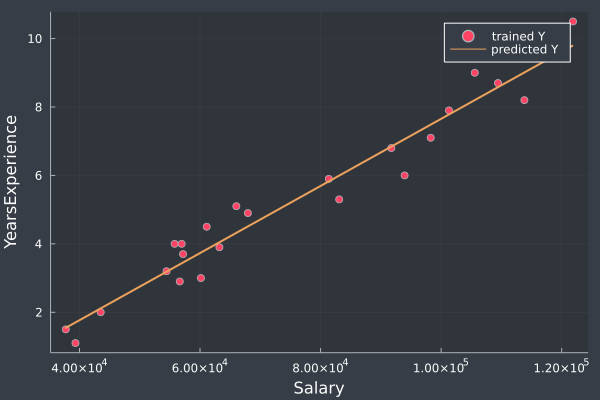

In [7]:
yp = predict(ols)
y2 = Base.hcat(train.YearsExperience, yp)
scatter(train.Salary, train.YearsExperience, label = "trained Y", ylabel = "YearsExperience", xlabel = "Salary")
plot!(train.Salary, yp, linewidth = 2, label = "predicted Y")

From the figure one can see the linear behavior of the data, and how well linear regression fits. 

### Question 2

##### A)

In [8]:
df2 = CSV.read("50_Startups.csv", DataFrame)

,R&D Spend,Administration,Marketing Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.65349e5,1.36898e5,4.71784e5,New York,1.92262e5
2,1.62598e5,1.51378e5,4.43899e5,California,1.91792e5
3,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
4,1.44372e5,1.18672e5,3.832e5,New York,182902.0
5,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
6,1.31877e5,99814.7,3.62861e5,New York,1.56991e5
7,1.34615e5,1.47199e5,1.27717e5,California,1.56123e5
8,1.30298e5,1.4553e5,3.23877e5,Florida,1.55753e5
9,1.20543e5,148719.0,3.11613e5,New York,1.52212e5


In [9]:
colnames = Symbol[]
for i in string.(names(df2))
    push!(colnames,Symbol(replace(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_"), "&" => "_")))
end

DataFrames.rename!(df2, colnames);

In [10]:
train, test = TrainTestSplit(df2,.75)

(35×5 DataFrame
 Row │ R_D_Spend       Administration  Marketing_Spend  State       Profit     ⋯
     │ Float64         Float64         Float64          String15    Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      1.65349e5       1.36898e5        4.71784e5  New York         1.922 ⋯
   2 │      1.62598e5       1.51378e5        4.43899e5  California       1.917
   3 │      1.53442e5       1.01146e5        4.07935e5  Florida          1.910
   4 │      1.44372e5       1.18672e5        3.832e5    New York    182902.0
   5 │      1.42107e5   91391.8              3.66168e5  Florida          1.661 ⋯
   6 │      1.31877e5   99814.7              3.62861e5  New York         1.569
   7 │      1.30298e5       1.4553e5         3.23877e5  Florida          1.557
   8 │      1.20543e5  148719.0              3.11613e5  New York         1.522
   9 │      1.01913e5       1.10594e5   229161.0        Florida     146122.0   ⋯
  10 │ 100672.0         91

In [11]:
names(df2)

5-element Vector{String}:
 "R_D_Spend"
 "Administration"
 "Marketing_Spend"
 "State"
 "Profit"

In [12]:
OSL1 = lm(@formula(Profit~R_D_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)  49456.5       3452.32       14.33    <1e-14  42432.7       56480.3
R_D_Spend        0.852633     0.0376036  22.67    <1e-20      0.776128      0.929138
────────────────────────────────────────────────────────────────────────────────────

In [13]:
OSL2 = lm(@formula(Profit~Administration), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Administration

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.    Std. Error     t  Pr(>|t|)     Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)     63752.4       29401.7       2.17    0.0374  3934.23       1.23571e5
Administration      0.449889      0.243946  1.84    0.0741    -0.0464238  0.946202
───────────────────────────────────────────────────────────────────────────────────

In [14]:
OSL3 = lm(@formula(Profit~Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error     t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)      54287.1       8318.26       6.53    <1e-06  37363.5       71210.7
Marketing_Spend      0.275745     0.0322231  8.56    <1e-09      0.210186      0.341303
───────────────────────────────────────────────────────────────────────────────────────

In [15]:
println("R_squared for profit regression on R&D Spend = $(r2(OSL1))")
println("R_squared for profit regression on Administration = $(r2(OSL2))")
println("R_squared for profit regression on Marketing spend = $(r2(OSL3))")

R_squared for profit regression on R&D Spend = 0.939684247918827
R_squared for profit regression on Administration = 0.09343445654166227
R_squared for profit regression on Marketing spend = 0.6893485577551763


R&D expense has the highest R-squared value, therefore is the best explanation of profits.

##### B)

In [16]:
OSL = lm(@formula(Profit~ R_D_Spend + Administration +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Administration + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                         Coef.    Std. Error      t  Pr(>|t|)      Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      49839.4        8308.36        6.00    <1e-05  32894.4        66784.5
R_D_Spend            0.785991      0.0723736  10.86    <1e-11      0.638384       0.933598
Administration      -0.0214359     0.06972    -0.31    0.7606     -0.163631       0.120759
Marketing_Spend      0.0326664     0.0258902   1.26    0.2165     -0.0201371      0.0854699
───────────────────────────────────────────────────────────────────────────────────────────

In [17]:
OSL12 = lm(@formula(Profit~ R_D_Spend + Administration ), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Administration

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error      t  Pr(>|t|)     Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)     54104.5        7659.5         7.06    <1e-07  38502.6       69706.4
R_D_Spend           0.862088      0.0403734  21.35    <1e-19      0.77985       0.944326
Administration     -0.0460223     0.0675578  -0.68    0.5006     -0.183633      0.0915885
─────────────────────────────────────────────────────────────────────────────────────────

In [18]:
OSL13 = lm(@formula(Profit~ R_D_Spend +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + R_D_Spend + Marketing_Spend

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                         Coef.    Std. Error      t  Pr(>|t|)      Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      47553.2        3653.14       13.02    <1e-13  40112.0        54994.4
R_D_Spend            0.776748      0.064897   11.97    <1e-12      0.644557       0.908939
Marketing_Spend      0.0348912     0.0245042   1.42    0.1642     -0.0150222      0.0848047
───────────────────────────────────────────────────────────────────────────────────────────

In [19]:
OSL23 = lm(@formula(Profit~ Administration +Marketing_Spend), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Administration + Marketing_Spend

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                        Coef.    Std. Error     t  Pr(>|t|)       Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      21934.5       17045.9       1.29    0.2074  -12787.0        56655.9
Administration       0.293066      0.136826  2.14    0.0399       0.0143593      0.571772
Marketing_Spend      0.266979      0.030875  8.65    <1e-09       0.204089       0.32987
─────────────────────────────────────────────────────────────────────────────────────────

In [20]:
println("R_squared for profit regression on R&D Spend and Administration = $(r2(OSL12))")
println("R_squared for profit regression on R&D Spend and Marketing Spend = $(r2(OSL13))")
println("R_squared for profit regression on Administration and Marketing Spend = $(r2(OSL23))")
println("R_squared for profit regression on all three types of expenses = $(r2(OSL))")

R_squared for profit regression on R&D Spend and Administration = 0.9405464575405151
R_squared for profit regression on R&D Spend and Marketing Spend = 0.9432780312787362
R_squared for profit regression on Administration and Marketing Spend = 0.7283004600645975
R_squared for profit regression on all three types of expenses = 0.9434504709131627


From the results one can see that including R&D spense (with any other feature) defines the final result. groups containing R&D expense have the highest R-squared and the best results. Including all of them is slightly effected by the other two features.

##### C)

In [21]:
states = OrderedSet(df2.State)

OrderedSet{String15} with 3 elements:
  "New York"
  "California"
  "Florida"

In [22]:
train_NY = train[findall(x -> x == states[1], train[!,end-1]),:]
train_Califronia = train[findall(x -> x == states[2], train[!,end-1]),:]
train_Florida = train[findall(x -> x == states[3], train[!,end-1]),:]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
2,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
3,1.30298e5,1.4553e5,3.23877e5,Florida,1.55753e5
4,1.01913e5,1.10594e5,229161.0,Florida,146122.0
5,1.19943e5,1.56547e5,2.56513e5,Florida,1.32603e5
6,91749.2,1.14176e5,2.9492e5,Florida,1.24267e5
7,73994.6,1.22783e5,3.03319e5,Florida,1.10352e5
8,61994.5,1.15641e5,91131.2,Florida,99937.6
9,55493.9,1.03057e5,2.14635e5,Florida,96778.9


In [23]:
NY = lm(@formula(Profit ~ Marketing_Spend), train_NY)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                        Coef.     Std. Error     t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      68328.8       10449.8        6.54    <1e-04  45916.1       90741.5
Marketing_Spend      0.228534      0.0420491  5.43    <1e-04      0.138348      0.318721
────────────────────────────────────────────────────────────────────────────────────────

In [24]:
California = lm(@formula(Profit ~ Marketing_Spend), train_Califronia)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                       Coef.     Std. Error     t  Pr(>|t|)      Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      6728.04      13949.5        0.48    0.6467  -27405.2       40861.2
Marketing_Spend     0.437628      0.0547324  8.00    0.0002       0.303703      0.571554
────────────────────────────────────────────────────────────────────────────────────────

In [25]:
Florida = lm(@formula(Profit ~ Marketing_Spend), train_Florida)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Profit ~ 1 + Marketing_Spend

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                        Coef.     Std. Error     t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)      44133.0       19885.7        2.22    0.0536  -851.577    89117.6
Marketing_Spend      0.317565      0.0726319  4.37    0.0018     0.15326      0.48187
─────────────────────────────────────────────────────────────────────────────────────

In [38]:
println("R_squared for profit regression for New York = $(r2(NY))")
println("R_squared for profit regression for California = $(r2(California))")
println("R_squared for profit regression for Florida = $(r2(Florida))")


R_squared for profit regression for New York = 0.6784457799784525
R_squared for profit regression for California = 0.9142030496937185
R_squared for profit regression for Florida = 0.6799043836036838


The obtained result from the regression are very much smiliar for profits in New York and Florida, but higher r-squared and coefficient for California, which means that the (linear) relationship between the expenses is better interpreted in California. 

### Questen 3

In [26]:
df3 = CSV.read("Social_Network_Ads.csv", DataFrame)

,Age,EstimatedSalary,Purchased
,Int64,Int64,Int64
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0


##### A)

In [27]:
train, test = TrainTestSplit(df3, .75)

(297×3 DataFrame
 Row │ Age    EstimatedSalary  Purchased 
     │ Int64  Int64            Int64     
─────┼───────────────────────────────────
   1 │    19            19000          0
   2 │    35            20000          0
   3 │    26            43000          0
   4 │    27            57000          0
   5 │    19            76000          0
   6 │    32           150000          1
   7 │    26            80000          0
   8 │    18            82000          0
   9 │    29            80000          0
  10 │    47            25000          1
  11 │    46            28000          1
  ⋮  │   ⋮           ⋮             ⋮
 288 │    57            33000          1
 289 │    49            39000          1
 290 │    48            35000          1
 291 │    48            33000          1
 292 │    47            23000          1
 293 │    45            45000          1
 294 │    39            59000          0
 295 │    51            23000          1
 296 │    36            33000          0


In [28]:
countmap(df3.Purchased)

Dict{Int64, Int64} with 2 entries:
  0 => 257
  1 => 143

In [29]:
logit = glm(@formula(Purchased ~ EstimatedSalary + Age), train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Purchased ~ 1 + EstimatedSalary + Age

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      -6.58065     0.711196    -9.25    <1e-19  -7.97457     -5.18673
EstimatedSalary   2.00865e-5  3.38847e-6   5.93    <1e-08   1.34452e-5   2.67278e-5
Age               0.118296    0.0141418    8.36    <1e-16   0.0905782    0.146013
───────────────────────────────────────────────────────────────────────────────────

In [30]:
prediction = predict(logit, test)
prediction_class = [if x<0.5 0 else 1 end for x in prediction]
compare_df = DataFrame("actual_class" => test.Purchased, "predicted_class" => prediction_class, "prediction_prob" => prediction)

,actual_class,predicted_class,prediction_prob
,Int64,Int64,Float64?
1,0,0,0.0131535
2,0,0,0.044622
3,0,0,0.00153619
4,0,0,0.128255
5,0,0,0.00693789
6,0,0,0.00643592
7,0,0,0.00747411
8,1,0,0.23114
9,1,0,0.20741


In [31]:
confusion_matrix1 = MLBase.roc(compare_df."actual_class", compare_df."predicted_class")

ROCNums{Int64}
  p = 42
  n = 61
  tp = 28
  tn = 59
  fp = 2
  fn = 14


##### B)

In [32]:
train, test = TrainTestSplit(df3, .20)
logit20 = glm(@formula(Purchased ~ EstimatedSalary + Age), train, Binomial(), ProbitLink())
prediction_class20 = [if x<0.5 0 else 1 end for x in predict(logit20, test)]
confusion_matrix20 = MLBase.roc(test.Purchased, prediction_class20)

ROCNums{Int64}
  p = 119
  n = 218
  tp = 90
  tn = 190
  fp = 28
  fn = 29


In [33]:
train, test = TrainTestSplit(df3, .50)
logit50 = glm(@formula(Purchased ~ EstimatedSalary + Age), train, Binomial(), ProbitLink())
prediction_class50 = [if x<0.5 0 else 1 end for x in predict(logit50, test)]
confusion_matrix50 = MLBase.roc(test.Purchased, prediction_class50)

ROCNums{Int64}
  p = 72
  n = 119
  tp = 42
  tn = 115
  fp = 4
  fn = 30


In [34]:
train, test = TrainTestSplit(df3, .80)
logit80 = glm(@formula(Purchased ~ EstimatedSalary + Age), train, Binomial(), ProbitLink())
prediction_class80 = [if x<0.5 0 else 1 end for x in predict(logit80, test)]
confusion_matrix80 = MLBase.roc(test.Purchased, prediction_class80)

ROCNums{Int64}
  p = 31
  n = 46
  tp = 22
  tn = 40
  fp = 6
  fn = 9


### Question 4

In [35]:
GOLD = yahoo(:GOLD, YahooOpt(period1 = DateTime(2015, 1), period2 = DateTime(2022, 6), interval = "1mo"));
CL = yahoo(:CL, YahooOpt(period1=DateTime(2015, 1), period2=DateTime(2022, 6), interval = "1mo"));
FFR = CSV.read("FEDFUNDS.csv", DataFrame);

In [36]:
df = DataFrame()
df.LagGOLD = values(GOLD[:Close])[1:end-1]
df.CL = values(CL[:Close])[2:end]
df.FFR = FFR.FEDFUNDS[2:end]
df.GOLD = values(GOLD[:Close])[2:end]

F1 = @formula(GOLD ~ LagGOLD)
Regress1 = lm(F1, df);

F2 = @formula(GOLD ~ LagGOLD + CL)
Regress2 = lm(F2, df);

F3 = @formula(GOLD ~ LagGOLD + CL + FFR)
Regress3 = lm(F3, df);

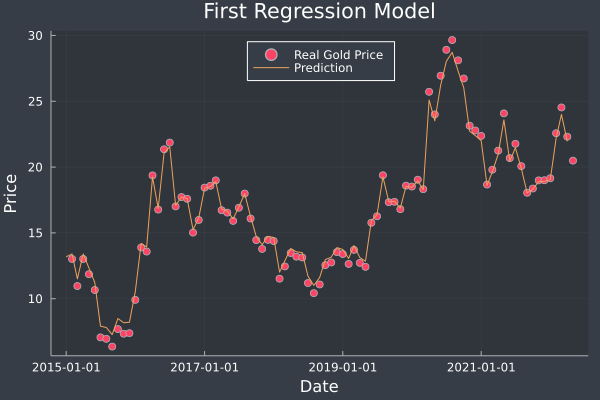

In [37]:
scatter(timestamp(GOLD)[2:end], df.GOLD, label = "Real Gold Price")
plot!(timestamp(GOLD)[1:end-1], predict(Regress1), label = "Prediction")
plot!(xlabel = "Date", ylabel = "Price", legend = 100, title = "First Regression Model")